In [4]:
%pylab inline
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from joblib import Parallel, delayed

Populating the interactive namespace from numpy and matplotlib


In [5]:
gps_train = pd.read_csv('gps_train.tsv', names=(['time','id','type','hash','shirota','dolgota']), delimiter="\t")
gps_test = pd.read_csv('gps_test.tsv', names=(['time','id','type','hash','shirota','dolgota']), delimiter="\t")
stops = pd.read_csv('stops_train.tsv', names=(['shirota','dolgota']), delimiter="\t")

In [6]:
stops = pd.read_csv('stops_train.tsv', delimiter="\t")
stops.head(10)

,62.5012004,58.4141742
0,62.501362,58.414122
1,62.501798,58.419767
2,62.501802,58.418158
3,62.502411,58.423775
4,62.502539,58.425823
5,62.504765,58.432364
6,62.505822,58.433348
7,62.508392,58.433000
8,62.509119,58.432608
9,62.514872,58.431763


68


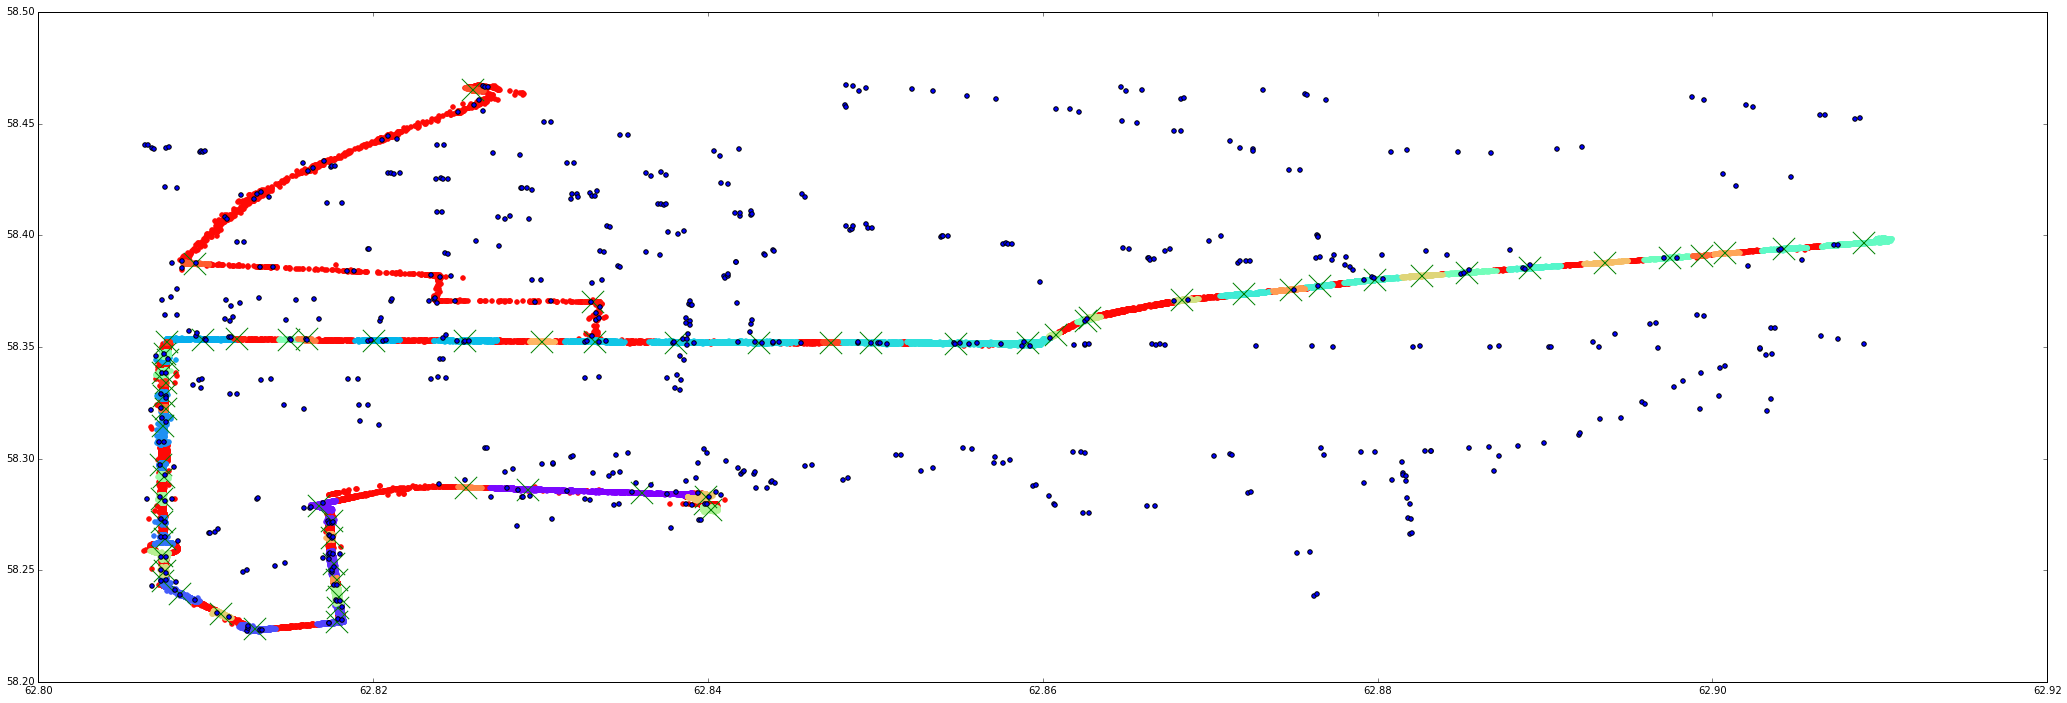

In [13]:
gps_train = pd.read_csv('gps_train.tsv', names=(['time','id','type','hash','shirota','dolgota']), delimiter="\t")
gps_test = pd.read_csv('gps_test.tsv', names=(['time','id','type','hash','shirota','dolgota']), delimiter="\t")
stops = pd.read_csv('stops_train.tsv', names=(['shirota','dolgota']), delimiter="\t")
stops = np.array(stops)

def make_pred(data,marshrut):
    ttt = np.array(data[['shirota','dolgota']][data['hash']==marshrut])
    km = DBSCAN(eps=5e-4, min_samples=40, metric='euclidean', algorithm='auto')
    km.fit(ttt)
    print('marshrut',marshrut)
    cores = km.core_sample_indices_
    clusters = np.unique(km.labels_)
    centers = []
    for clust_num in clusters:
        if clust_num != -1:
            mask = np.where(km.labels_ == clust_num)[0]
            cur_cores_inds = list(set(mask).intersection(set(cores)))
            cur_cores = np.median(ttt[cur_cores_inds],axis=0)
            centers.append(cur_cores)
    return np.array(centers)

ttt = np.array(gps_train[['shirota','dolgota']][gps_train['hash']==6400038450057762])
shir_min, shir_max = np.min(ttt[:,0]), np.max(ttt[:,0])
dolg_min, dolg_max = np.min(ttt[:,1]), np.max(ttt[:,1])
mask1 = shir_min <= stops[:,0]
mask2 = stops[:,0] <= shir_max
mask3 = dolg_min <= stops[:,1]
mask4 = stops[:,1] <= dolg_max
stops = stops[mask1*mask2*mask3*mask4]
#km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
#            precompute_distances='auto', verbose=0, random_state=3, n_jobs=1)
#km = MeanShift(bandwidth=1e-3, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=False)
km = DBSCAN(eps=5e-4, min_samples=50, metric='euclidean', algorithm='auto')
km.fit(ttt)
cores = km.core_sample_indices_
clusters = np.unique(km.labels_)
colors = cm.rainbow(np.linspace(0, 1, len(clusters)))
plt.figure(figsize=(36,12))
for clust_num in clusters:
    if clust_num != -1:
        mask = np.where(km.labels_ == clust_num)[0]
        cur_cores_inds = list(set(mask).intersection(set(cores)))
        cur_cores = np.median(ttt[cur_cores_inds],axis=0)
        locations = ttt[mask]
        plt.scatter(locations[:,0], locations[:,1], color = colors[clust_num-1])
        plt.scatter(cur_cores[0], cur_cores[1],marker='x',color='green',s=500)
    else:
        mask = np.where(km.labels_ == clust_num)[0]
        locations = ttt[mask]
        plt.scatter(locations[:,0], locations[:,1], color = colors[clust_num-1])
    
plt.scatter(stops[:,0],stops[:,1],marker='o')
plt.savefig('clusters1.png')

print(len(set(km.labels_)))

In [16]:
hashes = set(gps_train['hash'])
res = Parallel(n_jobs=4)(delayed(make_pred)(gps_train,hash_num) 
                                    for hash_num in hashes)
res_stops = []
for j in range(len(res)):
    for i in range(len(res[j])):
        res_stops.append(res[j][i])

marshrut -962543404097237498
marshrut 6400038450057760
marshrut 6400038450057761
marshrut 6400038450057762
marshrutmarshrutmarshrutmarshrut 6400038450057764
 6400038450057763
 6400038450057772
 7168021561
marshrutmarshrutmarshrutmarshrut -4340709941616810953
 6400038450057773
 -2088598916599095245
 6784040757061226
marshrutmarshrutmarshrutmarshrut 6784040757061220
 -2088598916599095236
 163512108404620377
 6784040757061231
marshrutmarshrutmarshrutmarshrut 6784040757061229
 6784040757061225
 6784040757061227
 -2088598916598095239
marshrutmarshrutmarshrutmarshrut -2088598916598095240
 6784040757061230
 -2088598916598095248
 -2088598916598095235
marshrutmarshrutmarshrutmarshrut -2088598916598095236
 -2088598916598095247
 -2088598916598095238
 163512108413620362
marshrutmarshrutmarshrutmarshrut 163512108413620360
 -2088598916598095237
 -2088598916598095234
 7168043064064658
marshrutmarshrutmarshrutmarshrut 163512108405620368
 -2088598916598095233
 163512108413620363
 7168043064064667
marsh

In [17]:
hashes = set(gps_test['hash'])
res = Parallel(n_jobs=4)(delayed(make_pred)(gps_test,hash_num) 
                                    for hash_num in hashes)
res_stops = []
for j in range(len(res)):
    for i in range(len(res[j])):
        res_stops.append(res[j][i])

marshrut -962543404097237501
marshrut -962543404097237499
marshrut -962543404097237497
marshrut 163512108403620372
marshrutmarshrutmarshrutmarshrut 163512108403620373
 163512108403620374
 -3214654429114953192
 -3214654429114953189
marshrutmarshrutmarshrutmarshrut 163512108403620379
 6400038450057760
 6400038450057761
 6400038450057763
marshrutmarshrutmarshrutmarshrut 6400038450057764
 6400038450057766
 6400038450057765
 6656020021
marshrutmarshrutmarshrutmarshrut 6400038450057767
 -2088598916599095235
 6400038450057772
 -3214654429107953089
marshrutmarshrutmarshrutmarshrut -4340709941616810954
 6784040757061220
 7168021561
 6784040757061221
marshrutmarshrutmarshrutmarshrut 163512108404620371
 6784040757061226
 163512108404620376
 6784040757061229
marshrutmarshrutmarshrutmarshrut 6784040757061228
 -3214654429106953100
 6784040757061224
 -2088598916604095351
marshrutmarshrutmarshrutmarshrut 163512108413620357
 163512108413620364
 6784040757061231
 -2088598916612095341
marshrutmarshrutmar

In [19]:
print(len(res_stops))
print(res_stops[:5])
with open('output_test.txt', 'w', encoding='utf-8') as output_file:
    print(len(res_stops), file=output_file)
    for stop in res_stops:
        print(stop[0], stop[1], file=output_file)

2206
[array([ 63.268183,  57.669334]), array([ 63.268652 ,  57.6697505]), array([ 63.2677175,  57.671569 ]), array([ 62.983213,  58.335135]), array([ 62.982752,  58.351979])]


In [18]:
print(len(res_stops))
print(res_stops[:5])
with open('output_prod.txt', 'w', encoding='utf-8') as output_file:
    print(len(res_stops), file=output_file)
    for stop in res_stops:
        print(stop[0], stop[1], file=output_file)

2206
[array([ 63.268183,  57.669334]), array([ 63.268652 ,  57.6697505]), array([ 63.2677175,  57.671569 ]), array([ 62.983213,  58.335135]), array([ 62.982752,  58.351979])]
